*Read section 3.1 of the book before using these notes.*

*Note that in this course, lecture notes are not sufficient, you must read the book for better understanding. Lecture notes are just implementing the concepts of the book on a dataset, but not explaining the concepts elaborately.*

## Simple Linear Regression

In [69]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression

**Develop a simple linear regression model that predicts car price based on engine size.**
Datasets to be used: *Car_features_train.csv, Car_prices_train.csv*

In [2]:
# We are reading training data ONLY at this point.
# Test data is already separated in another file
trainf = pd.read_csv('./Datasets/Car_features_train.csv') # Predictors
trainp = pd.read_csv('./Datasets/Car_prices_train.csv') # Response
train = pd.merge(trainf,trainp)
train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,18473,bmw,6 Series,2020,Semi-Auto,11,Diesel,145,53.3282,3.0,37980
1,15064,bmw,6 Series,2019,Semi-Auto,10813,Diesel,145,53.0430,3.0,33980
2,18268,bmw,6 Series,2020,Semi-Auto,6,Diesel,145,53.4379,3.0,36850
3,18480,bmw,6 Series,2017,Semi-Auto,18895,Diesel,145,51.5140,3.0,25998
4,18492,bmw,6 Series,2015,Automatic,62953,Diesel,160,51.4903,3.0,18990


### Training with [`statsmodels`](https://www.statsmodels.org/stable/index.html)

In [3]:
# Let's create the model
    
# ols stands for Ordinary Least Squares - the name of the algorithm that optimizes Linear Regression models

# data input needs the dataframe that has the predictor and the response
# formula input needs to:
    # be a string
    # have the following syntax: "response~predictor"
    
# Using engineSize to predict price
ols_object = smf.ols(formula = 'price~engineSize', data = train)

In [4]:
#Using the fit() function of the 'ols' class to fit the model, i.e., train the model
model = ols_object.fit()

In [5]:
#Printing model summary which contains among other things, the model coefficients
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     3177.
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:06:15   Log-Likelihood:                -53949.
No. Observations:                4960   AIC:                         1.079e+05
Df Residuals:                    4958   BIC:                         1.079e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4122.0357    522.260     -7.893      0.000   -5145.896   -3098.176
engineSize  1.299e+04    230.450     56.361      0.000    1.25e+04    1.34e+04
==============================================================================
Omnibus:                     1271.986   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6490.719
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       8.122   Cond. No.                         7.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model equation is:
car price = -4122.0357 + 12990 * `engineSize`

The coefficients can also be returned directly usign the `params` attribute of the `model` object returned by the `fit()` method of the `ols` class:

In [6]:
model.params

Intercept     -4122.035744
engineSize    12988.281021
dtype: float64

**Visualize the regression line**

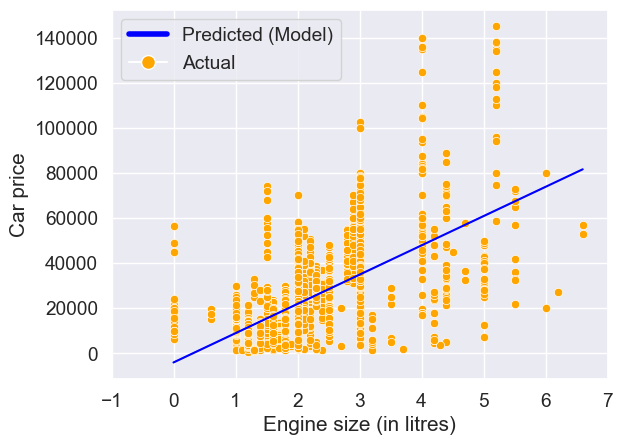

In [32]:
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = train.engineSize, y = train.price,color = 'orange')
sns.lineplot(x = train.engineSize, y = model.fittedvalues,color = 'blue')
plt.xlim(-1,7)
plt.xlabel('Engine size (in litres)')
plt.ylabel('Car price')
legend_elements = [Line2D([0], [0], color='blue', lw=4, label='Predicted (Model)'),
                   Line2D([0], [0], marker='o', color='w', label='Actual',
                          markerfacecolor='orange', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left');

Note that the above plot can be made directly using the seaborn function `regplot()`. The function `regplot()` fits a simple linear regression model with `y` as the response, and `x` as the predictor, and then plots the model over a scatteplot of the data.

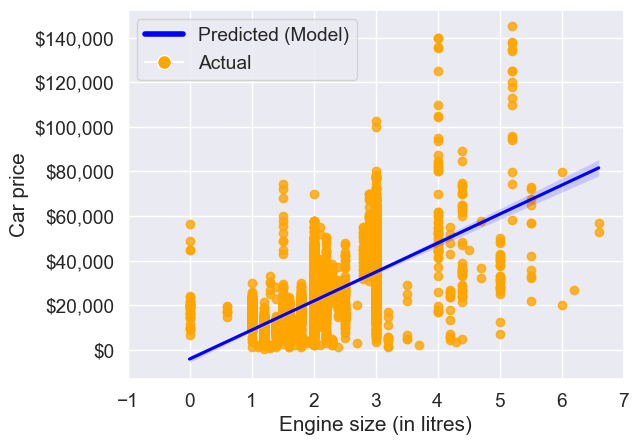

In [33]:
ax = sns.regplot(x = 'engineSize', y = 'price', data = train, color = 'orange',line_kws={"color": "blue"})
plt.xlim(-1,7)
plt.xlabel('Engine size (in litres)')
plt.ylabel('Car price')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.legend(handles=legend_elements, loc='upper left');
#Note that some of the engineSize values are 0. They are incorrect, and should ideally be imputed before developing the model.

The light shaded region around the blue line in the above plot is the confidence interval.

**Predict the car price for the cars in the test dataset**. Datasets to be used: *Car_features_test.csv, Car_prices_test.csv*

Now that the model has been trained, let us evaluate it on unseen data. Make sure that the columns names of the predictors are the same in train and test datasets.

In [64]:
# Read the test data
testf = pd.read_csv('./Datasets/Car_features_test.csv') # Predictors
testp = pd.read_csv('./Datasets/Car_prices_test.csv') # Response
test = pd.merge(testf, testp)

In [36]:
#Using the predict() function associated with the 'model' object to make predictions of car price on test (unknown) data
pred_price = model.predict(testf)#Note that the predict() function finds the predictor 'engineSize' in the testf dataframe, and plugs its values in the regression equation for prediction.

**Make a visualization that compares the predicted car prices with the actual car prices**

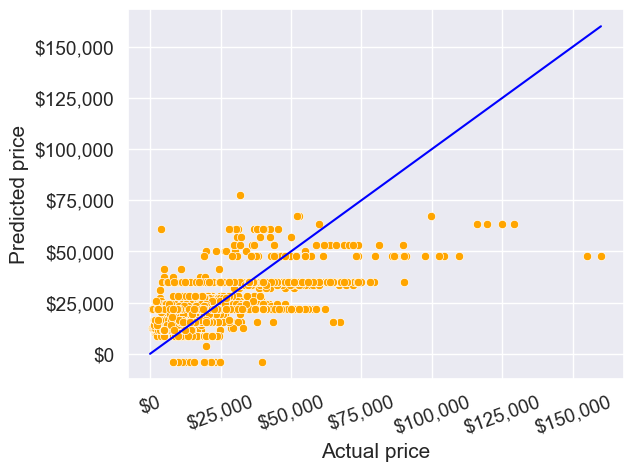

In [42]:
sns.scatterplot(x = testp.price, y = pred_price, color = 'orange')
#In case of a perfect prediction, all the points must lie on the line x = y.
ax = sns.lineplot(x = [0,testp.price.max()], y = [0,testp.price.max()],color='blue') #Plotting the line x = y.
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')
plt.xticks(rotation=20);

The prediction doesn't look too good. This is because we are just using one predictor - engine size. We can probably improve the model by adding more predictors when we learn multiple linear regression.

**What is the RMSE of the predicted car price on unseen data?**

In [10]:
np.sqrt(((testp.price - pred_price)**2).mean())

12995.1064515487

The root mean squared error in predicting car price is around $13k.

**What is the residual standard error based on the training data?**

In [11]:
np.sqrt(model.mse_resid)

12810.109175214136

The residual standard error on the training data is close to the RMSE on the test data. This shows that the performance of the model on unknown data is comparable to its performance on known data. This implies that the model is not overfitting, which is good! In case we overfit a model on the training data, its performance on unknown data is likely to be worse than that on the training data.

**Find the confidence and prediction intervals of the predicted car price**

In [43]:
#Using the get_prediction() function associated with the 'model' object to get the intervals
intervals = model.get_prediction(testf)

In [44]:
#The function requires specifying alpha (probability of Type 1 error) instead of the confidence level to get the intervals
intervals.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
1,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
2,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
3,8866.245277,316.580850,8245.606701,9486.883853,-16254.905974,33987.396528
4,47831.088340,468.949360,46911.740050,48750.436631,22700.782946,72961.393735
...,...,...,...,...,...,...
2667,47831.088340,468.949360,46911.740050,48750.436631,22700.782946,72961.393735
2668,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
2669,8866.245277,316.580850,8245.606701,9486.883853,-16254.905974,33987.396528
2670,21854.526298,184.135754,21493.538727,22215.513869,-3261.551421,46970.604017


**Show the regression line predicting car price based on engine size for test data. Also show the confidence and prediction intervals for the car price.**

In [45]:
interval_table = intervals.summary_frame(alpha=0.05)

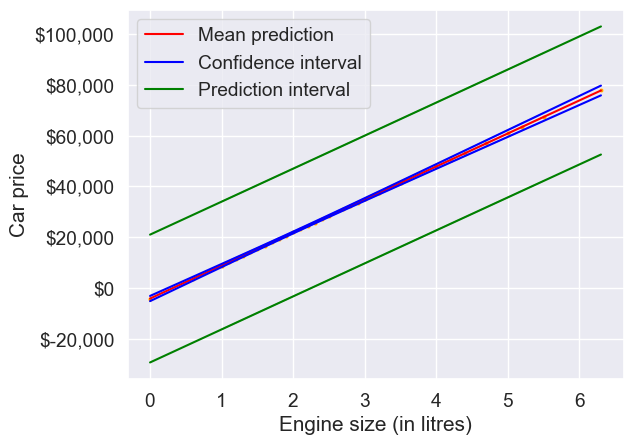

In [56]:
ax = sns.scatterplot(x = testf.engineSize, y = pred_price,color = 'orange', s = 10)
sns.lineplot(x = testf.engineSize, y = pred_price, color = 'red')
sns.lineplot(x = testf.engineSize, y = interval_table.mean_ci_lower, color = 'blue')
sns.lineplot(x = testf.engineSize, y = interval_table.mean_ci_upper, color = 'blue')
sns.lineplot(x = testf.engineSize, y = interval_table.obs_ci_lower, color = 'green')
sns.lineplot(x = testf.engineSize, y = interval_table.obs_ci_upper, color = 'green')

legend_elements = [Line2D([0], [0], color='red', label='Mean prediction'),
                   Line2D([0], [0], color='blue', label='Confidence interval'),
                  Line2D([0], [0], color='green', label='Prediction interval')]
ax.legend(handles=legend_elements, loc='upper left')
plt.xlabel('Engine size (in litres)')
plt.ylabel('Car price')
ax.yaxis.set_major_formatter('${x:,.0f}');

### Training with [`sklearn`](https://scikit-learn.org/stable/)

In [60]:
# Create the model as an object

model = LinearRegression() # No inputs, this will change for other models

# Train the model - separate the predictor(s) and the response for this!
X_train = train[['engineSize']]
y_train = train[['price']]

# Note that both are dfs, NOT series - necessary to avoid errors

model.fit(X_train, y_train)

# Check the slight syntax differences
    # predictors and response separate
    # We need to manually slice the predictor column(s) we want to include
    # No need to assign to an output
    
# Return the parameters
print("Coefficient of engine size = ", model.coef_) # slope
print("Intercept = ", model.intercept_) # intercept

# No .summary() here! - impossible to do much inference; this is a shortcoming of sklearn

Coefficient of engine size =  [[12988.28102112]]
Intercept =  [-4122.03574424]


In [66]:
# Prediction

# Again, separate the predictor(s) and the response of interest
X_test = test[['engineSize']]
y_test = test[['price']].to_numpy() # Easier to handle with calculations as np array

y_pred = model.predict(X_test)

# Evaluate
model_rmse = np.sqrt(np.mean((y_pred - y_test)**2)) # RMSE
model_mae = np.mean(np.abs(y_pred - y_test)) # MAE

print('Test RMSE: ', model_rmse)

Test RMSE:  12995.106451548696


**Note:** Why did we repeat the same task in two different libraries?

- `statsmodels` and `sklearn` have different advantages - we will use both for our purposes
    - `statsmodels` returns a lot of statistical output, which is very helpful for inference (coming up next) but it has a limited variety of models.
    - With `statsmodels`, you may have columns in your DataFrame in addition to predictors and response, while with `sklearn` you need to make separate objects consisting of only the predictors and the response.
    - `sklearn` includes many models (`Lasso` and `Ridge` this quarter, many others next quarter) and helpful tools/functions (like metrics) that statsmodels does not but it does not have any inference tools.

### Training with `statsmodels.api`

Earlier we had used the `statsmodels.formula.api` module, where we had to put the regression model as a formula. We can also use the `statsmodels.api` module to develop a regression model. The syntax of training a model with the `OLS()` function in this model is similar to that of `sklearn`'s `LinearRegression()` function. However, the order in which the predictors and response is specified is different. The formula-style syntax is generally preferred. However, depending on the situation, the `OLS()` syntax of `statsmodels.api` may be preferred.

Note that you will manually need to add the predictor *(a column of ones)* corresponding to the intercept to train the model with this method.

In [86]:
# Create the model as an object

# Train the model - separate the predictor(s) and the response for this!
X_train = train[['engineSize']]
y_train = train[['price']]

X_train_with_intercept = np.concatenate((np.ones(X_train.shape[0]).reshape(-1,1), X_train), axis = 1)

model = sm.OLS(y_train, X_train_with_intercept).fit()
    
# Return the parameters
print(model.params) 

const    -4122.035744
x1       12988.281021
dtype: float64


The model summary and all other attributes and methods of the `model` object are the same as that with the object created using the `statsmodels.formula.api` module.

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     3177.
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:17:55   Log-Likelihood:                -53949.
No. Observations:                4960   AIC:                         1.079e+05
Df Residuals:                    4958   BIC:                         1.079e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4122.0357    522.260     -7.893      0.000   -5145.896   -3098.176
x1          1.299e+04    230.450     56.361      0.000    1.25e+04    1.34e+04
==============================================================================
Omnibus:                     1271.986   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6490.719
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       8.122   Cond. No.                         7.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""